# Numerical Stability and Initialization

Thus far, every model that we have implemented required that we initialize its parameters according to some pre-specified distribution. Until now, we took the initialization scheme for granted, glossing over the details of how these choices are made. You might have even gotten the impression that these choices are not especially important. To the contrary, the choice of initialization scheme plays a significant role in neural network learning, and it can be crucial for maintaining numerical stability. Moreover, these choices can be tied up in interesting ways with the choice of the nonlinear activation function. Which function we choose and how we initialize parameters can determine how quickly our optimization algorithm converges. Poor choices here can cause us to encounter exploding or vanishing gradients while training. In this section, we delve into these topics with greater detail and discuss some useful heuristics that you will find useful throughout your career in deep learning.

## Vanishing and Exploding Gradients

The risks posed by unstable gradients go beyond numerical representation. Gradients of unpredictable magnitude also threaten the stability of our optimization algorithms. We may be facing parameter updates that are either (i) excessively large, destroying our model (the exploding gradient problem); or (ii) excessively small (the vanishing gradient problem), rendering learning impossible as parameters hardly move on each update.

### Vanishing Gradients

Since early artificial neural networks were inspired by biological neural networks, the idea of neurons that fire either fully or not at all (like biological neurons) seemed appealing. Let’s take a closer look at the sigmoid to see why it can cause vanishing gradients.

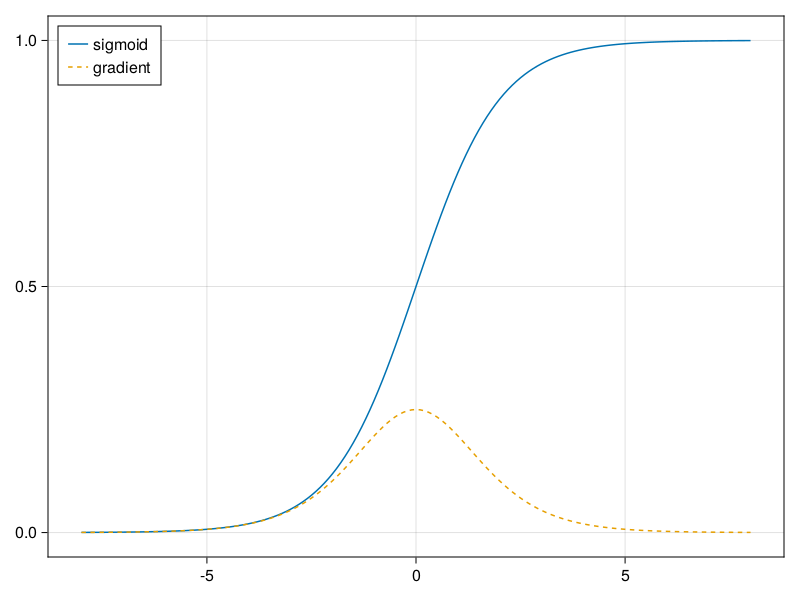

In [1]:
using CairoMakie
using Flux

x = -8.0:0.1:8.0
f,ax = lines(x,sigmoid,label="sigmoid")
lines!(x,sigmoid',label="gradient",linestyle=:dash)
axislegend(position=:lt)
f

As you can see, the sigmoid’s gradient vanishes both when its inputs are large and when they are small. Moreover, when backpropagating through many layers, unless we are in the Goldilocks zone, where the inputs to many of the sigmoids are close to zero, the gradients of the overall product may vanish. When our network boasts many layers, unless we are careful, the gradient will likely be cut off at some layer. Indeed, this problem used to plague deep network training. Consequently, ReLUs, which are more stable (but less neurally plausible), have emerged as the default choice for practitioners.

### Exploding Gradients

The opposite problem, when gradients explode, can be similarly vexing. To illustrate this a bit better, we draw 100 Gaussian random matrices and multiply them with some initial matrix.

In [2]:
using Distributions

M = rand(Normal(),(4,4))
println("a single matrix")
display(M)
println("after multiplying 100 matrices")
M*=reduce(*,map(x->rand(Normal(),(4,4)),1:100))
display(M)

a single matrix


4×4 Matrix{Float64}:
 -1.05678   -0.263555  -0.205375  -1.19783
 -1.23638    0.675443  -1.11012    1.15837
 -0.960691   0.628987   0.189805   1.03047
 -0.98534    0.107866   0.917991  -0.507334

after multiplying 100 matrices


4×4 Matrix{Float64}:
 6.98955e22  2.03892e23  1.26077e20  -8.06923e22
 2.07651e23  6.05706e23  3.69729e20  -2.39717e23
 2.68355e23  7.8281e23   4.8288e20   -3.09805e23
 2.11011e23  6.15556e23  3.82741e20  -2.43611e23